In [1]:
import cv2 as cv
from matplotlib import pyplot as plt

In [17]:
img = cv.imread('cat_photo.png', cv.IMREAD_COLOR)

In [180]:
blurred_img = cv.blur(img, ksize=(9, 9))

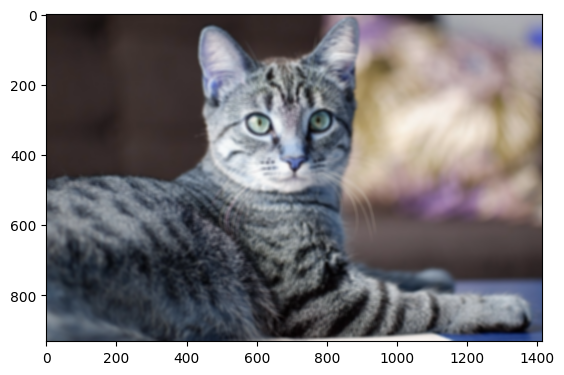

In [181]:
plt.imshow(blurred_img)

In [182]:
h, w, c = blurred_img.shape

In [183]:
edges = cv.Canny(blurred_img, 10, 50)

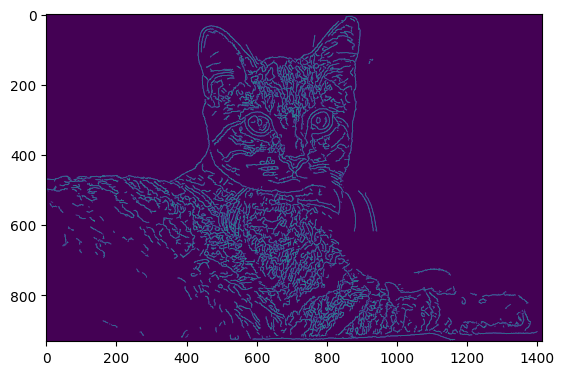

In [184]:
plt.imshow(edges)

In [185]:
POINT_DOWNSAMPLE = 10

In [186]:
contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
svg = ""
svg += f'<svg viewBox="0 0 {h} {w}" xmlns="http://www.w3.org/2000/svg"> <path fill="none" stroke="black" d="'
for line in contours:
    for i in range(0, len(line) - POINT_DOWNSAMPLE, POINT_DOWNSAMPLE):
        x1, y1 = line[i][0]
        x2, y2 = line[i + POINT_DOWNSAMPLE // 3][0]
        x3, y3 = line[i + (2 * POINT_DOWNSAMPLE) // 3][0]
        x4, y4 = line[i + POINT_DOWNSAMPLE][0]
        svg += f"M {x1},{y1} C {x2},{y2} {x3},{y3} {x4},{y4} "
svg += '"/></svg>'

In [187]:
with open("cat.svg", "w") as svgfile:
    svgfile.write(svg)